In [148]:
import pandas as pd
ad = pd.read_csv("Reklamlar veri seti.csv",usecols = [1,2,3,4])
df = ad.copy()
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [149]:
x = df.drop("sales", axis = 1)#tüm bağımsız değişkenleri seçtik.
x[0:10]

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
5,8.7,48.9,75.0
6,57.5,32.8,23.5
7,120.2,19.6,11.6
8,8.6,2.1,1.0
9,199.8,2.6,21.2


In [150]:
y = df["sales"]#bağımlı değişkeni seçtik.
y[0:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [151]:
from sklearn.model_selection import train_test_split,cross_val_score

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 42)
#ayrı ayrı test ve train için bağımlı ve bağımsız değişkenlerden oluşan veri setlerini ayırdık.
#test_size test için veri setinin yüzde kaçının ayrılacağını gösterir.
#random_state ise her üretmede farklı değerlerin çıkmaması için girilen bir değerdir.

In [153]:
x_train.shape

(160, 3)

In [154]:
x_test.shape

(40, 3)

In [155]:
y_train.shape

(160,)

In [156]:
y_test.shape

(40,)

In [157]:
training = df.copy()#veri setinin ilk halini de kullanmamız gerekirse diye kaydettik.

In [158]:
training.shape

(200, 4)

## STATSMODELS

Statsmodels kütüphanesi genelde veri seti üzerinde yorumlama ihtiyacımız olduğunda kullanılır.Sklearn kütüphanesi ise diğer makine öğrenmesi fonksiyonları uygulamaları ile birlikte kullanılabilecek modeller oluştururken kullanırız.

In [159]:
import statsmodels.api as sm

In [160]:
#x_train = sm.add_constant(x_train) 
#statsmodel ile model oluştururken sabit katsayıya ulaşmak için ilk kısma bu fonksiyonla 1'ler eklenir

In [161]:
lm = sm.OLS(y_train,x_train)

In [162]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  sales   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2935.
Date:                Sun, 04 Apr 2021   Prob (F-statistic):                   1.28e-137
Time:                        21:18:28   Log-Likelihood:                         -336.65
No. Observations:                 160   AIC:                                      679.3
Df Residuals:                     157   BIC:                                      688.5
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
TV             0.0531      0.001     36.467      0.000       0.050       0.056
radio          0.2188      0.011     20.138      0.000       0.197       0.240
newspaper      0.0239      0.008      3.011      0.003       0.008       0.040
==============================================================================
Omnibus:                       11.405   Durbin-Watson:                   1.895
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               15.574
Skew:                          -0.432   Prob(JB):                     0.000415
Kurtosis:                       4.261   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-kare ve düzeltilmiş r-kare değerleri açıklanabilirlik değeridir.Yani bu değere göre bağımsız değişkenlerimiz modelimizde bağımlı değişkenlerin %98'ini açıklar.

In [163]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
TV,0.0531,0.001,36.467,0.000,0.050,0.056
radio,0.2188,0.011,20.138,0.000,0.197,0.240
newspaper,0.0239,0.008,3.011,0.003,0.008,0.040


## SKLEARN

In [164]:
from sklearn.linear_model import LinearRegression

In [165]:
lm = LinearRegression()

In [166]:
model = lm.fit(x_train,y_train)

In [167]:
model.intercept_#sabit katsayıyı aldık.

2.979067338122631

In [168]:
model.coef_#bağımsız değişkenlerin katsayılarını aldık.
#İlk 0'ın nedeni statsmodelde model oluşturmak için ekledğimiz 1 değerleridir.
#Sklearnde model oluştururken bu değerleri eklememize gerek yoktur.

array([0.04472952, 0.18919505, 0.00276111])

# Tahmin

In [169]:
yeni_veri = [[30],[10],[40]]
yeni_veri = pd.DataFrame(yeni_veri).T

In [170]:
model.predict(yeni_veri)

array([6.32334798])

In [171]:
import numpy as np
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train,model.predict(x_train)))

In [172]:
rmse
#bu değer(hata kareler ortalamasının karekökü) modelin tahmin doğruluk değerini gösteren bir değerdir.
#Train veri setleri üzerinden yaptığımız için bu hata eğitim hatasıdır.

1.644727765644337

In [173]:
rmse_test = np.sqrt(mean_squared_error(y_test,model.predict(x_test)))

In [174]:
rmse_test
#Bu değerde test veri setleri üzetrinden hesaplandığı için test hatasıdır.

1.7815996615334508

In [175]:
model.score(x_train,y_train)#r-kare değeri

0.8957008271017818

# Model Tuning/Model Doğrulama

Model doğrulama yani model tuningin amacı bizim train ve test veri setlerini ayırırken verdiğimiz örneğin random_state gibi değişkenleri değiştirerek hata oranlarını optimum değere getirmek amaçlanır.Bunun için cross validation yöntemi kullanılır.

In [176]:
cross_val_score(model,x_train,y_train,cv = 10,scoring = "r2").mean()
#cv değeri kaç katlı cross validation olacağını gösterir.Yani o sayı kadar farklı değer gösterir.
#scoring değeri ise hangi hata değeri üzerinden hataları göstereceğidir.
#Bu yöntemle hataların değerlerinin daha doğru ve daha gerçeği yansıtan bir şekilde alabiliyoruz.

0.791354859691634

In [177]:
np.sqrt(-cross_val_score(model,x_train,y_train,cv = 10,
                scoring = "neg_mean_squared_error")).mean()
#hata kareler ortalaması ve hata kareler ortalamasının karekökü değerlerinin ortalamalarına göre daha doğru bir hata değerine eriştik.

1.651352373031333

In [178]:
np.sqrt(-cross_val_score(model,x_test,y_test,cv = 10,
                scoring = "neg_mean_squared_error")).mean()
#test hatasının rmse değeriniN daha doğrulanmış halini bulduk.

1.846277882399709

## Modeldeki Hatalara Grafikten bakmak 

In [198]:
yeni = pd.DataFrame({"gerçek_d": y_train,
                     "tahmin_d": model.predict(x_train)},
                   index = np.arange(0,160))
yeni["hata"] = yeni["gerçek_d"]-yeni["tahmin_d"]
yeni.head()

,gerçek_d,tahmin_d,hata
0,22.1,9.688275,12.411725
1,10.4,12.673377,-2.273377
2,9.3,10.055333,-0.755333
3,18.5,8.200102,10.299898
4,12.9,13.495621,-0.595621


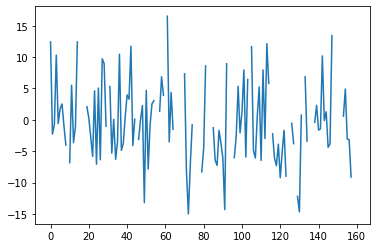

In [199]:
import matplotlib.pyplot as plt
plt.plot(yeni["hata"]);